# Graduate Challenge

We would like you to showcase your Python (or other coding language e.g. Java, Golang etc.)
skills by tackling a data wrangling challenge that involves the open library public data API.

**Deliverables:**
● A well-commented script / notebook demonstrating the tasks mentioned above.

**Bonus Points:**
● Implement error handling in your script to gracefully handle any issues encountered by either the API or subsequently collected data

**Evaluation Criteria:**
● Functionality (completing all tasks)
● Code clarity and structure
● Efficiency and error handling
● Creativity and approach to high-level dataset exploration

This challenge will assess your ability to interact with APIs, parse data, and perform basic data
exploration using your language of choice. Good luck!

## Parse Available Datasets
- Write a Python script that retrieves a list of all books with the title “lord of the rings” from the below API (https://openlibrary.org/dev/docs/api/search)
- Parse the response from the API and write the names of the books to a dataset.
- Add 4 other columns showing data from the response

In [235]:
# Write a Python script that retrieves a list of all books 
# with the title “lord of the rings” from the below API 
# (https://openlibrary.org/dev/docs/api/search)

import requests
import pandas as pd

url = "https://openlibrary.org/search.json"
params= {
    'title': 'lord of the rings',
    'limit': 1000
}

api_data = requests.get(url, params=params).json()
api_data

{'numFound': 436,
 'start': 0,
 'numFoundExact': True,
 'docs': [{'author_alternative_name': ['J R R Tolkien',
    'J. R.R. Tolkien',
    'J. R. R. Tolkien',
    'John R. R. Tolkien',
    'Tolkien',
    'Yue Han Luo Na De Rui Er Tuo Er Jin',
    'Dzhon R. R. Tolkin',
    'John Ronald Reuel Tolkien',
    'J.R.R.Tolkien'],
   'author_key': ['OL26320A'],
   'author_name': ['J.R.R. Tolkien'],
   'contributor': ['Rob Inglis (Narrator, Reader)',
    'Rob Inglis (Narrator)',
    'Lee, Alan.',
    'Dramatization (Narrator)',
    'Ian Holm (Narrator)',
    'Brian Sibley (Narrator)',
    'Lee, Alan, 1947-',
    'Tanaka, Akiko.',
    'Kořínek, Otakar, 1946-',
    'Seta, Teiji, 1916-',
    'Tolkien, J. R. R. 1892-1973.'],
   'cover_edition_key': 'OL51694024M',
   'cover_i': 14625765,
   'ddc': ['823.91', '823.912', '823.914'],
   'ebook_access': 'printdisabled',
   'ebook_count_i': 24,
   'edition_count': 250,
   'edition_key': ['OL43140390M',
    'OL31403985M',
    'OL47181069M',
    'OL46534010M

In [141]:
#Parse the response from the API and write the names of the books to a dataset.
#BOOKS format = paperback OR hardcover

api_books = []
no_format_listed = []


# for each result (dictionary within list)
for doc_index, doc_result in enumerate(api_data['docs']):
# check if 'format' key is present
    try:
        #print(f"{
        api_data['docs'][doc_index]['format']
        #}")
    except KeyError: # If there is no 'format' key - add to no_format_listed
        print(f"KeyError : {api_data['docs'][doc_index]['title']} at index {doc_index} does not have a format")
        no_format_listed.append(api_data['docs'][doc_index])
    except :
        print("Other Error")
    else : # there is a 'format' key
# check if one of the formats listed is a BOOK, if so add it to list of BOOKS
        for format_index, format_type in enumerate(api_data['docs'][doc_index]['format']):
            if ('paperback' or 'hardcover') in api_data['docs'][doc_index]['format'][format_index].lower():
                #print(f"{api_book_check[doc_index]['title']} is a {api_book_check[doc_index]['format'][format_index]}")
                api_books.append(api_data['docs'][doc_index])
                break

print(f"{len(api_data['docs'])}, {len(api_books)}, {len(no_format_listed)}")

#no_format_listed

KeyError : Lord of the rings at index 1 does not have a format
KeyError : The Lord of the Rings at index 2 does not have a format
KeyError : Lord of the Rings at index 3 does not have a format
KeyError : Lord of the Rings Trivia : the Lord of the Rings Facts and Quizzes at index 5 does not have a format
KeyError : Lord of the Rings Film Facts : Everything for the Lord of the Rings Fans at index 6 does not have a format
KeyError : Lord of the Rings at index 7 does not have a format
KeyError : Lord of the Rings at index 9 does not have a format
KeyError : Lord of the Rings at index 12 does not have a format
KeyError : The Lord of the Rings at index 13 does not have a format
KeyError : Lord of the Rings at index 16 does not have a format
KeyError : Zhi huan mo at index 18 does not have a format
KeyError : Lords of the Ring at index 21 does not have a format
KeyError : Lord of the Ring's at index 23 does not have a format
KeyError : Lord of the rings at index 24 does not have a format
KeyE

In [236]:
# Check if one of the formats listed is a BOOK, if so add it to list of BOOKS
#print(api_books)
i=0
for format_index, format_type in enumerate(api_book_check[i]['format']):
    if ('paperback' or 'hardcover' or 'e-book') in api_book_check[i]['format'][format_index].lower():
        #print(f"{api_book_check[0]['title']} is a {api_book_check[i]['format'][format_index]}")
        api_books.append(api_book_check[i])
        break

#print(api_books)

In [237]:
lotr_df = pd.DataFrame.from_records(api_books)[['title', 'author_name', 'first_publish_year','has_fulltext']]
lotr_df

title  \
0                                The Lord of the Ring   
1                                   Lords of the Ring   
2            The Lord of the rings location guidebook   
3                                   Lord of the Rings   
4                               The Lord of the Rings   
5                                 The War of the Ring   
6                                         Study Guide   
7                                   Lord of the Rings   
8                                   Lords of the ring   
9              The Lord of the Rings - The Two Towers   
10                                  Lords of the Ring   
11                          Lord of the Rings Trilogy   
12                                            반지의제왕 1   
13                              The Lord of the Rings   
14                              The Lord of the Rings   
15               Lord of the Rings Instrumental Solos   
16                              The Lord of the Rings   
17                     Lord of the Rings Instrumental   
18                       Gollum ("Lord of the Rings")   
19               Finding God in the Lord of the Rings   
20           The Lord of the Rings location guidebook   
21  The Lord of the Rings The Fellowship of the Ri...   
22                               The Lord of the Ring   

                              author_name  first_publish_year  has_fulltext  
0     [Phil Anderson, Philip A. Anderson]                2006          True  
1                       [Bruce Blackadar]                1987         False  
2                            [Ian Brodie]                2002          True  
3                          [Betsy Gallup]                2006         False  
4                       [Patrick Gardner]                2002         False  
5   [J.R.R. Tolkien, Christopher Tolkien]                1990          True  
6                          [SuperSummary]                2017         False  
7                         [Carla Fritsch]                2004         False  
8                          [Peter Corris]                1980         False  
9      [Alessio Cavatore, Rick Priestley]                2003          True  
10                         [Peter Arnold]                1998          True  
11             [Howard Shore, Dan Coates]                2004         False  
12                       [J.R.R. Tolkien]                2002          True  
13                          [David Brawn]                2002         False  
14                         [Brian Sibley]                2002         False  
15                         [Howard Shore]                2004         False  
16                      [New Line Cinema]                2014         False  
17                         [Howard Shore]                2004         False  
18                          [Andy Serkis]                2003         False  
19                [Kurt Bruner, Jim Ware]                2003         False  
20                           [Ian Brodie]                2002         False  
21                          [Alison Sage]                2001          True  
22    [Phil Anderson, Philip A. Anderson]                2006          True

## Retrieve a Specific Dataset:
- Using any of the other API’s available in the above link, construct a dataset using a query that you have put together and fetched data for via the API. Use the examples listed as guidance on how to construct these queries

Status Code: 200
Response Content: {
    "numFound": 1168087,
    "start": 0,
    "numFoundExact": true,
    "docs": [
        {
            "author_key": [
                "OL8362496A"
            ],
            "author_name": [
                "Supersummary"
            ],
            "cover_edition_key": "OL41644945M",
            "cover_i": 13175019,
            "ebook_access": "no_ebook",
            "ebook_count_i": 0,
            "edition_count": 310,
            "edition_key": [
                "OL42014448M",
                "OL42014388M",
                "OL42012302M",
                "OL42011995M",
                "OL42008818M",
                "OL42007672M",
                "OL42007644M",
                "OL42007353M",
                "OL41992222M",
                "OL41987302M",
                "OL41987191M",
                "OL41986271M",
                "OL41984205M",
                "OL41983887M",
                "OL41969130M",
                "OL41962624M",
            

In [242]:
""" API CALL"""

# endpoint URL for Open Library search API
url2 = "https://openlibrary.org/search.json"

# Query parameters
params2 = {
    'q': 'first_publish_year:2019',
    'fields': 'first_publish_year,title,author_name,edition_count,publisher,ratings_average,ratings_sortable,ratings_count,ratings_count_1,ratings_count_2,ratings_count_3,ratings_count_4,ratings_count_5,readinglog_count,want_to_read_count,currently_reading_count,already_read_count',
    'page': 1,  # Start with the first page
    'limit': 1000  # Number of results per page
}
# Additional fields of interest: Subject could be the genre, number_of_pages_median, language
# considering not including 'publisher': ['Independently Published']


# Make the API request
response = requests.get(url2, params=params2)
api_data2 = response.json()

# Print the response status code and content
print("Status Code:", response.status_code)
print("Response Content:", response.text)

Status Code: 200
Response Content: {
    "numFound": 1168097,
    "start": 0,
    "numFoundExact": true,
    "docs": [
        {
            "author_name": [
                "Supersummary"
            ],
            "edition_count": 310,
            "first_publish_year": 2019,
            "publisher": [
                "Independently Published",
                "Independently published"
            ],
            "title": "Study Guide",
            "ratings_average": 2.0,
            "ratings_sortable": 1.9062978,
            "ratings_count": 2,
            "ratings_count_1": 1,
            "ratings_count_2": 0,
            "ratings_count_3": 1,
            "ratings_count_4": 0,
            "ratings_count_5": 0,
            "readinglog_count": 94,
            "want_to_read_count": 90,
            "currently_reading_count": 3,
            "already_read_count": 1
        },
        {
            "author_name": [
                "Donald Nguyen"
            ],
            "edition_count": 

In [243]:
sample_df = pd.DataFrame.from_records(api_data2['docs'])

In [245]:
sample_df

author_name  edition_count  \
0                               [Supersummary]            310   
1                              [Donald Nguyen]           2735   
2                            [Libros Maestros]             64   
3                  [Coloring Zone Press House]            143   
4                      [kids M. shop notebook]            826   
..                                         ...            ...   
995                    [Rogue Plus Publishing]             37   
996                               [Love Write]             37   
997                     [Shayne Coloring Book]             36   
998        [85th Birthday Guest Books Gallery]             37   
999  [Rafael Arturo Herrera, Miyamoto Musashi]             27   

     first_publish_year                                          publisher  \
0                  2019  [Independently Published, Independently publis...   
1                  2019                          [Independently Published]   
2                  2019                          [Independently Published]   
3                  2019  [Independently Published, Independently publis...   
4                  2019                          [Independently Published]   
..                  ...                                                ...   
995                2019                          [Independently Published]   
996                2019                          [Independently Published]   
997                2019                          [Independently Published]   
998                2019                          [Independently Published]   
999                2019                          [Independently Published]   

                                             title  ratings_average  \
0                                      Study Guide         2.000000   
1                                    Coloring Book              NaN   
2                                 Resumen Completo         5.000000   
3    Christmas Coloring and Activity Book for Kids         3.666667   
4                            Unicorn Coloring Book         5.000000   
..                                             ...              ...   
995                             Checkbook Register              NaN   
996                             2020 : Art Journal              NaN   
997         National Football League Coloring Book              NaN   
998                       85th Birthday Guest Book              NaN   
999                             Book of Five Rings              NaN   

     ratings_sortable  ratings_count  ratings_count_1  ratings_count_2  \
0            1.906298            2.0              1.0              0.0   
1                 NaN            NaN              NaN              NaN   
2            2.403664            1.0              0.0              0.0   
3            2.348352            3.0              1.0              0.0   
4            3.132986            4.0              0.0              0.0   
..                ...            ...              ...              ...   
995               NaN            NaN              NaN              NaN   
996               NaN            NaN              NaN              NaN   
997               NaN            NaN              NaN              NaN   
998               NaN            NaN              NaN              NaN   
999               NaN            NaN              NaN              NaN   

     ratings_count_3  ratings_count_4  ratings_count_5  readinglog_count  \
0                1.0              0.0              0.0              94.0   
1                NaN              NaN              NaN              47.0   
2                0.0              0.0              1.0              82.0   
3                0.0              0.0              2.0              44.0   
4                0.0              0.0              4.0              40.0   
..               ...              ...              ...               ...   
995              NaN              NaN      

In [248]:
sample_df.isnull().sum().sort_values(ascending=False) / len(sample_df)

ratings_count_1            0.558
ratings_count_4            0.558
ratings_average            0.558
ratings_sortable           0.558
ratings_count              0.558
ratings_count_5            0.558
ratings_count_2            0.558
ratings_count_3            0.558
currently_reading_count    0.299
want_to_read_count         0.299
readinglog_count           0.299
already_read_count         0.299
author_name                0.006
publisher                  0.002
edition_count              0.000
title                      0.000
first_publish_year         0.000
dtype: float64

In [255]:
count = sample_df['publisher'].apply(lambda x: 'Independently Published' in x).sum()
print(count)

TypeError: argument of type 'float' is not iterable

In [162]:
top2020_df = pd.DataFrame.from_records(api_data2)['docs'][['first_publish_year', 'title']] # , 'author_name', 'ratings_average', 'ratings_count'

print(len(top2020_df))
top2020_df.head()

KeyError: "None of [Index(['first_publish_year', 'title'], dtype='object')] are in the [index]"

## Brief Dataset Exploration:
- Explore the data you collected in step 2 and produce some interesting insights in the data found including any charts/graphs/tables

In [225]:
top_read = rate_2019_df.sort_values('readinglog_count', ascending=False)
top_read.head()

first_publish_year                          title            author_name  \
33                2019         Um casamento arranjado         [Zana Kheiron]   
16                2019        Red, White & Royal Blue      [Casey McQuiston]   
12                2019  A Good Girl's Guide to Murder        [Holly Jackson]   
40                2019    Before the Coffee Gets Cold  [Toshikazu Kawaguchi]   
80                2019         Heartstopper, Volume 2         [Alice Oseman]   

                language  number_of_pages_median  \
33                 [por]                   160.0   
16       [ger, eng, spa]                   462.0   
12  [pol, ger, eng, spa]                   424.0   
40            [eng, ger]                   239.0   
80       [rus, eng, spa]                   320.0   

                                            publisher  \
33  [Oxford, Lena, Lera.mobi, Bilionários , Lera, ...   
16  [St. Martin's Griffin, st. martin's publishing...   
12  [Random House Children's Books, One, Crossbook...   
40  [Harlequin Enterprises ULC, Cengage Gale, Pan ...   
80  [Popcorn Books, Hachette Children's Group, Des...   

                                               format  \
33                                            [Ebook]   
16  [Paperback, Epub, Trade paperback, library bin...   
12     [Taschenbuch, Paperback, Hardcover, paperback]   
40                   [audio cd, hardcover, paperback]   
80                             [Paperback, paperback]   

                                              subject  ratings_average  \
33                                    [romance, love]         4.135548   
16  [Fiction, gay, Fiction, romance, contemporary,...         4.175324   
12  [Cold cases (Criminal investigation)--Fiction....         4.184210   
40  [Magical realism, time travel, slice-of-life, ...         3.815790   
80  [High schools, Comic books, strips, Boys, Gays...         4.027027   

    ratings_sortable  ratings_count  readinglog_count  
33          4.056619         1114.0             23055  
16          3.978451          154.0              4045  
12          3.847138           76.0              3113  
40          3.397601           38.0              1231  
80          3.590248           37.0               889

In [214]:
top_rate = rate_2019_df.sort_values('ratings_sortable', ascending=False)
top_rate.head()

first_publish_year                    title        author_name  \
43                2019         Permanent Record   [Edward Snowden]   
20                2019                 Piranesi   [Susanna Clarke]   
33                2019   Um casamento arranjado     [Zana Kheiron]   
16                2019  Red, White & Royal Blue  [Casey McQuiston]   
88                2019         Gideon the Ninth      [Tamsyn Muir]   

           language  number_of_pages_median  \
43       [ger, eng]                   352.0   
20  [ita, eng, spa]                   272.0   
33            [por]                   160.0   
16  [ger, eng, spa]                   462.0   
88       [spa, eng]                   448.0   

                                            publisher  \
43  [Macmillan Audio, S. Fischer, Pan Books, Macmi...   
20  [Bloomsbury Publishing Plc, Heyne, Bloomsbury ...   
33  [Oxford, Lena, Lera.mobi, Bilionários , Lera, ...   
16  [St. Martin's Griffin, st. martin's publishing...   
88  [Tordotcom, Ediciones B, Recorded Books, Inc. ...   

                                               format  \
43  [paperback, audio cd, Paperback, gebundene Aus...   
20  [Paperback, eBook, library binding, gift, pape...   
33                                            [Ebook]   
16  [Paperback, Epub, Trade paperback, library bin...   
88           [paperback, audio cd, E-Book, Hardcover]   

                                              subject  edition_count  \
43  [Snowden, edward j., 1983-, Government informa...             12   
20  [English literature, nyt:combined-print-and-e-...             18   
33                                    [romance, love]             15   
16  [Fiction, gay, Fiction, romance, contemporary,...             19   
88  [Fiction, science fiction, action & adventure,...              6   

    ratings_average  ratings_sortable  ratings_count  readinglog_count  
43         4.520834          4.181192           48.0               230  
20         4.472222          4.066048           36.0               273  
33         4.135548          4.056619         1114.0             23055  
16         4.175324          3.978451          154.0              4045  
88         4.254546          3.932408           55.0               356

"What makes a great book?"

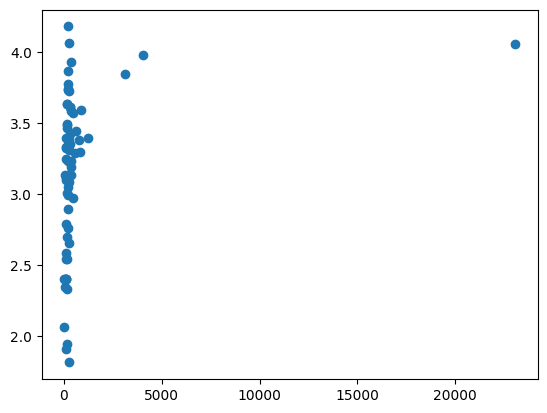

In [226]:
import matplotlib.pyplot as plt

plt.scatter(rate_2019_df['readinglog_count'], rate_2019_df['ratings_sortable'])

(array([ 3.,  1.,  7.,  5.,  5., 12., 16.,  9.,  7.,  4.]),
 array([1.8131121 , 2.04992013, 2.28672816, 2.52353619, 2.76034422,
        2.99715225, 3.23396028, 3.47076831, 3.70757634, 3.94438437,
        4.1811924 ]),
 <BarContainer object of 10 artists>)

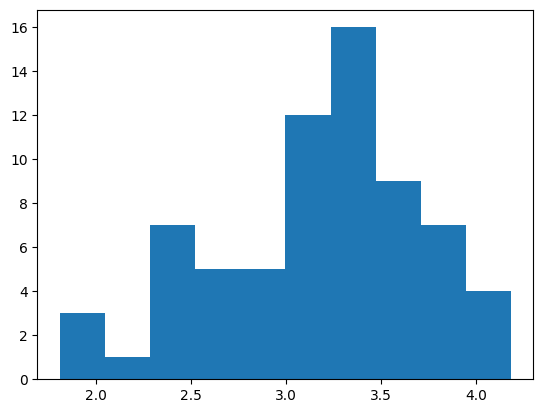

In [227]:
plt.hist(top_rate['ratings_sortable'])

(array([97.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.0000e+00, 2.3100e+03, 4.6150e+03, 6.9200e+03, 9.2250e+03,
        1.1530e+04, 1.3835e+04, 1.6140e+04, 1.8445e+04, 2.0750e+04,
        2.3055e+04]),
 <BarContainer object of 10 artists>)

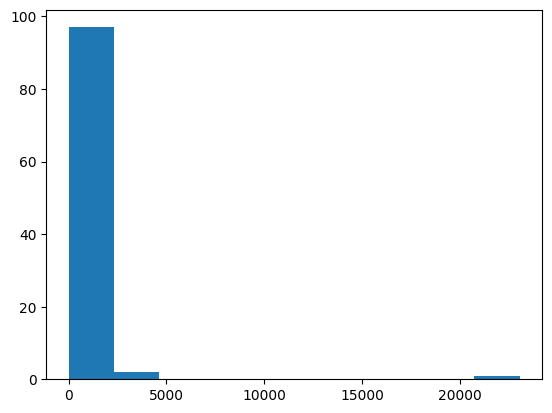

In [220]:
plt.hist(top_read['readinglog_count'])

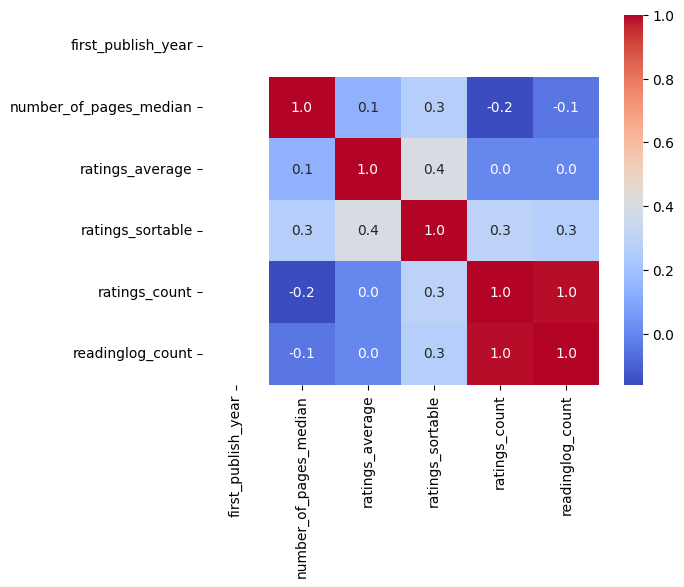

In [231]:
import seaborn as sns
rate = round(rate_2019_df.corr(),2)
sns.heatmap(rate, cmap = "coolwarm", annot = True, fmt=".1f");

In [ ]:
import statsmodels api as sm
# to perform regression